In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("processing_outputs/cleaned_data.csv")
df

,rera_ids,far,number_of_towers,total_unit_count,1_5BHK_count,1BHK_count,1RK_count,2_5BHK_count,2BHK_count,3_5BHK_count,...,4_5BHK,5BHK,avg_price,airport_distance_kms,ksr_jn_distance_kms,yeshwantpur_jn_distance_kms,nearest_metro_dist_kms,nearest_metro_station,nearest_major_road_dist_kms,nearest_major_road
0,PRM/KA/RERA/1251/446/PR/191022/005340,2.00000,1.0,126,0.0,0.0,0.0,0.0,61.0,0.0,...,0,0,8.500000,30.743633,18.789358,24.737635,6.197776,Nallurahalli,0.471653,Kadabeesanahalli Main Road
1,PRM/KA/RERA/1251/446/PR/150224/006619,2.25000,1.0,84,0.0,0.0,0.0,0.0,52.0,0.0,...,0,0,6.250000,17.722085,16.062128,18.537574,4.735450,Singayyanapalya,1.975241,Old Madras Road
2,PRM/KA/RERA/1251/446/PR/300924/007102,2.20000,1.0,60,0.0,0.0,0.0,0.0,28.0,0.0,...,0,0,8.020000,16.838685,11.915246,11.929444,7.787598,Benniganahalli,0.638142,Thanisandra Main Road
3,PRM/KA/RERA/1251/310/PR/051224/007268,2.49000,1.0,126,0.0,2.0,0.0,0.0,0.0,0.0,...,0,0,9.000000,37.695984,25.095496,31.528721,13.506856,Nallurahalli,7.823073,Kadabeesanahalli Main Road
4,PRM/KA/RERA/1251/308/PR/210524/006935,1.56000,1.0,166,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,13.430000,40.058996,18.659459,25.630953,12.408801,Yelachenahalli,2.580445,Hosur Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,PRM/KA/RERA/1250/303/PR/300125/007458,2.08240,6.0,463,0.0,0.0,0.0,0.0,72.0,0.0,...,0,0,10.000000,4.344371,25.641484,22.806291,20.835486,Krishnarajapura,8.243584,Bagalur Road
273,PRM/KA/RERA/1251/308/PR/091224/007276,1.48000,1.0,33,0.0,0.0,0.0,0.0,33.0,0.0,...,0,0,5.080000,32.779344,24.129898,29.924016,8.981898,Hopefarm Channasandra,4.949467,Varthur Main Road
274,PRM/KA/RERA/1251/309/PR/180823/006187,2.55325,2.0,264,0.0,28.0,0.0,0.0,118.0,0.0,...,0,0,11.950000,5.368229,23.205871,21.311835,17.252628,Krishnarajapura,6.586075,Bagalur Road
275,PRM/KA/RERA/1251/308/PR/230522/004901,2.74900,6.0,1104,0.0,0.0,0.0,0.0,24.0,0.0,...,0,0,8.901250,36.016173,23.841043,30.163816,11.810772,Nallurahalli,6.142877,Kadabeesanahalli Main Road


In [3]:
df

,rera_ids,far,number_of_towers,total_unit_count,1_5BHK_count,1BHK_count,1RK_count,2_5BHK_count,2BHK_count,3_5BHK_count,...,4_5BHK,5BHK,avg_price,airport_distance_kms,ksr_jn_distance_kms,yeshwantpur_jn_distance_kms,nearest_metro_dist_kms,nearest_metro_station,nearest_major_road_dist_kms,nearest_major_road
0,PRM/KA/RERA/1251/446/PR/191022/005340,2.00000,1.0,126,0.0,0.0,0.0,0.0,61.0,0.0,...,0,0,8.500000,30.743633,18.789358,24.737635,6.197776,Nallurahalli,0.471653,Kadabeesanahalli Main Road
1,PRM/KA/RERA/1251/446/PR/150224/006619,2.25000,1.0,84,0.0,0.0,0.0,0.0,52.0,0.0,...,0,0,6.250000,17.722085,16.062128,18.537574,4.735450,Singayyanapalya,1.975241,Old Madras Road
2,PRM/KA/RERA/1251/446/PR/300924/007102,2.20000,1.0,60,0.0,0.0,0.0,0.0,28.0,0.0,...,0,0,8.020000,16.838685,11.915246,11.929444,7.787598,Benniganahalli,0.638142,Thanisandra Main Road
3,PRM/KA/RERA/1251/310/PR/051224/007268,2.49000,1.0,126,0.0,2.0,0.0,0.0,0.0,0.0,...,0,0,9.000000,37.695984,25.095496,31.528721,13.506856,Nallurahalli,7.823073,Kadabeesanahalli Main Road
4,PRM/KA/RERA/1251/308/PR/210524/006935,1.56000,1.0,166,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,13.430000,40.058996,18.659459,25.630953,12.408801,Yelachenahalli,2.580445,Hosur Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,PRM/KA/RERA/1250/303/PR/300125/007458,2.08240,6.0,463,0.0,0.0,0.0,0.0,72.0,0.0,...,0,0,10.000000,4.344371,25.641484,22.806291,20.835486,Krishnarajapura,8.243584,Bagalur Road
273,PRM/KA/RERA/1251/308/PR/091224/007276,1.48000,1.0,33,0.0,0.0,0.0,0.0,33.0,0.0,...,0,0,5.080000,32.779344,24.129898,29.924016,8.981898,Hopefarm Channasandra,4.949467,Varthur Main Road
274,PRM/KA/RERA/1251/309/PR/180823/006187,2.55325,2.0,264,0.0,28.0,0.0,0.0,118.0,0.0,...,0,0,11.950000,5.368229,23.205871,21.311835,17.252628,Krishnarajapura,6.586075,Bagalur Road
275,PRM/KA/RERA/1251/308/PR/230522/004901,2.74900,6.0,1104,0.0,0.0,0.0,0.0,24.0,0.0,...,0,0,8.901250,36.016173,23.841043,30.163816,11.810772,Nallurahalli,6.142877,Kadabeesanahalli Main Road


In [4]:
df.dtypes

rera_ids                        object
far                            float64
number_of_towers               float64
total_unit_count                 int64
1_5BHK_count                   float64
1BHK_count                     float64
1RK_count                      float64
2_5BHK_count                   float64
2BHK_count                     float64
3_5BHK_count                   float64
3BHK_count                     float64
4_5BHK_count                   float64
4BHK_count                     float64
5BHK_count                     float64
1_5BHK_mean_carpet_area        float64
1BHK_mean_carpet_area          float64
1RK_mean_carpet_area           float64
2_5BHK_mean_carpet_area        float64
2BHK_mean_carpet_area          float64
3_5BHK_mean_carpet_area        float64
3BHK_mean_carpet_area          float64
4_5BHK_mean_carpet_area        float64
4BHK_mean_carpet_area          float64
5BHK_mean_carpet_area          float64
cost_of_land_inr                 int64
district                 

In [5]:
# Prepare features and target
X = df[['latitude', 'longitude']]
y = df['taluk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train KNN model
# Start with k=5, you can experiment with different values
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
y_pred = knn.predict(X_test_scaled)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8035714285714286

In [10]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

         Anekal       0.75      1.00      0.86         9
 Bengaluru East       0.89      0.89      0.89        19
Bengaluru North       0.67      0.75      0.71         8
Bengaluru South       0.73      0.67      0.70        12
    Devanahalli       1.00      1.00      1.00         3
       Hosakote       1.00      0.67      0.80         3
      Yelahanka       0.00      0.00      0.00         2

       accuracy                           0.80        56
      macro avg       0.72      0.71      0.71        56
   weighted avg       0.78      0.80      0.79        56



/Users/abhineshkourav/Projects/property_scrape/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/abhineshkourav/Projects/property_scrape/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/abhineshkourav/Projects/property_scrape/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [11]:
# Find optimal k value
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    score = knn_temp.score(X_test_scaled, y_test)
    k_scores.append(score)

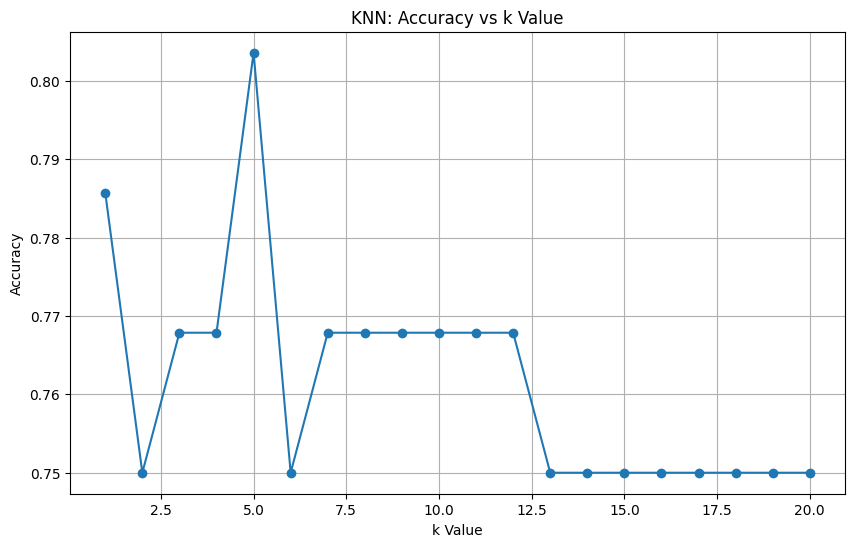

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k Value')
plt.grid(True)
plt.show()


In [13]:
# Best k value
best_k = k_range[np.argmax(k_scores)]
print(f"\nBest k value: {best_k} with accuracy: {max(k_scores):.3f}")


Best k value: 5 with accuracy: 0.804


In [14]:
# Retrain with best k
if best_k != 5:
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train_scaled, y_train)
    y_pred_best = knn_best.predict(X_test_scaled)
    print(f"Accuracy with k={best_k}: {accuracy_score(y_test, y_pred_best):.3f}")

In [15]:
def predict_taluk(lat, lon):
    """Predict taluk for given latitude and longitude"""
    new_point = scaler.transform([[lat, lon]])
    prediction = knn.predict(new_point)
    probabilities = knn.predict_proba(new_point)
    
    print(f"Coordinates: ({lat}, {lon})")
    print(f"Predicted taluk: {prediction[0]}")
    print("Probabilities:")
    for i, prob in enumerate(probabilities[0]):
        print(f"  {knn.classes_[i]}: {prob:.3f}")
    
    return prediction[0]

In [16]:
predict_taluk(13.104,77.568)

Coordinates: (13.104, 77.568)
Predicted taluk: Bengaluru North
Probabilities:
  Anekal: 0.000
  Bengaluru East: 0.000
  Bengaluru North: 0.600
  Bengaluru South: 0.000
  Devanahalli: 0.000
  Hosakote: 0.000
  Yelahanka: 0.400


/Users/abhineshkourav/Projects/property_scrape/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Bengaluru North'

In [17]:
# Save the model and scaler as pickle files
import pickle

# Save the trained model
with open('models/knn_taluk_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Save the scaler (important for preprocessing new data)
with open('models/taluk_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\n" + "="*50)
print("MODEL SAVED")
print("="*50)
print("✓ Model saved as 'knn_taluk_model.pkl'")
print("✓ Scaler saved as 'scaler.pkl'")




MODEL SAVED
✓ Model saved as 'knn_taluk_model.pkl'
✓ Scaler saved as 'scaler.pkl'


In [20]:
with open('models/knn_taluk_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    
with open('models/taluk_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

In [21]:
lat, lon = 13.104, 77.568
#  Make prediction
new_point = loaded_scaler.transform([[lat, lon]])
prediction = loaded_model.predict(new_point)
probabilities = loaded_model.predict_proba(new_point)

print(f"Loaded model prediction for ({lat}, {lon}): {prediction[0]}")

Loaded model prediction for (13.104, 77.568): Bengaluru North


/Users/abhineshkourav/Projects/property_scrape/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
